In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re
import warnings
warnings.filterwarnings('ignore')

In [135]:
path = 'D:/complete-proj/2021/07/apply/ilmuone-data/dataset'
all_files = glob.glob('dataset' + '/*.csv')

In [136]:
lst = []
for filename in all_files:
    data = pd.read_csv(filename, index_col=None, header=0)
    
    grpby_id = data.groupby(by='Identifier').mean().round(2)
    for identifier, sales_mean in zip(grpby_id.index, grpby_id.values):
        data['Sales'] = data['Sales'].mask((data['Sales'].isnull()) & (data['Identifier'] == identifier), sales_mean)
    
    lst.append(data)

In [137]:
df = pd.concat(lst, axis=0, ignore_index=True)

In [139]:
df['Date'] = pd.to_datetime(df['Date'])

In [140]:
df['Category'] = np.nan

In [141]:
bool_cat2isnull_cat3isnull = (df['Category2'].isnull()) & (df['Category3'].isnull())
bool_cat2notnull_cat3isnull = (df['Category2'].notnull()) & (df['Category3'].isnull())
bool_cat2notnull_cat3notnull = (df['Category2'].notnull()) & (df['Category3'].notnull())

In [142]:
df['Category'] = df['Category'].mask(bool_cat2isnull_cat3isnull, df['Category1'])
df['Category'] = df['Category'].mask(bool_cat2notnull_cat3isnull, df['Category1'] + ' ' + df['Category2'])
df['Category'] = df['Category'].mask(bool_cat2notnull_cat3notnull, df['Category1'] + ' ' + df['Category2'] + ' ' + df['Category3'])

In [143]:
df = df.drop(['Category1', 'Category2', 'Category3'], axis=1)

In [144]:
df = df[~df['Identifier'].str.contains(r'[0-9]')]

In [12]:
df

Date      Maker    Sales  Identifier          Category
0      2010-02-15    Toshino   2143.0  RVFWTWSMNU  Air Conditioners
2      2010-02-15      Akaza   3515.0  VUQUQMHODG  Washers & Dryers
3      2010-02-15      Akaza    687.0  XVIOZZOUTN     Refrigerators
4      2010-02-15    Shimada    435.0  RBRMDIXXGL  Washers & Dryers
6      2010-02-15     Funami    726.0   BIBIOOIHA     Refrigerators
...           ...        ...      ...         ...               ...
134956 2021-04-29    Shimada   1258.0  WVJTPVZKAQ  Ovens & Cooktops
134960 2021-04-29      Akaza   5422.0  VUQUQMHODG  Washers & Dryers
134961 2021-04-29  Hayashida    539.0  GCPKFKSEWG   Vacuum Cleaners
134962 2021-04-29   Furutani  10547.0  FVDHIZGQRC       Water Pumps
134963 2021-04-29     Kikuma    805.0  FRBLLORNXN       Televisions

[93171 rows x 5 columns]

In [11]:
df.isnull().sum()

Date          0
Maker         0
Sales         0
Identifier    0
Category      0
dtype: int64

In [14]:
df.to_csv('df-clean-03.csv', index=False)

# -----
## Checkpoint
# -----

In [19]:
by_date = df.groupby(by='Date').sum()
by_date

Sales
Date                 
2010-02-15   92680.57
2010-02-16   91157.83
2010-02-17   92596.33
2010-02-18   90822.00
2010-02-19   90028.21
...               ...
2021-04-23  142664.00
2021-04-26  141279.35
2021-04-27  140634.53
2021-04-28  141308.61
2021-04-29  142560.01

[2784 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

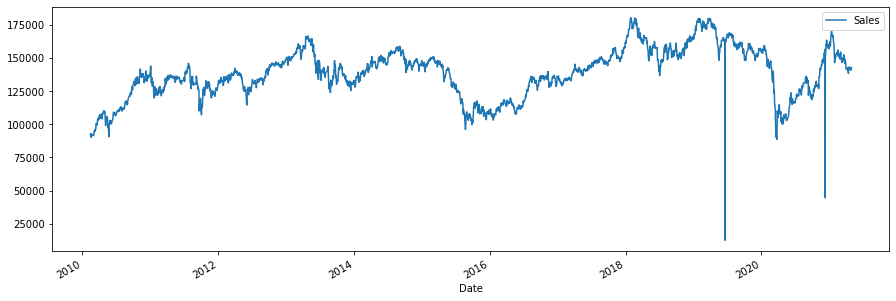

In [20]:
by_date.plot(figsize=(15, 5))

In [26]:
by_date.loc['2010-02-15']

Sales    92680.57
Name: 2010-02-15 00:00:00, dtype: float64

In [28]:
by_date.loc['2019-01-01':'2020-01-01']

Sales
Date                 
2019-01-01  165976.60
2019-01-02  164221.00
2019-01-03  165482.41
2019-01-04  167766.72
2019-01-07  167481.22
...               ...
2019-12-20  155812.12
2019-12-23  156154.47
2019-12-26  156528.95
2019-12-27  156973.00
2019-12-30  155277.00

[258 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

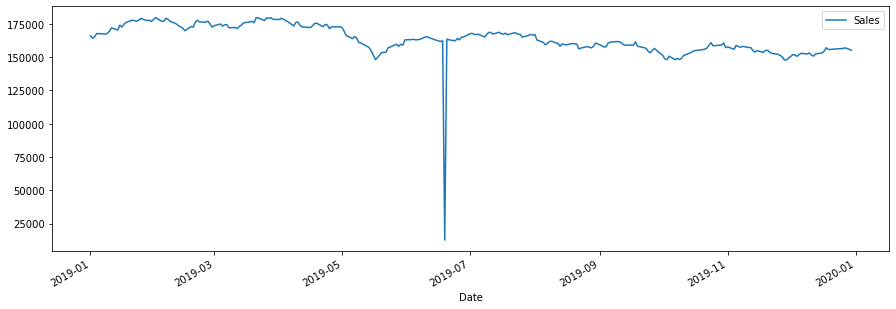

In [30]:
by_date.loc['2019-01-01':'2020-01-01'].plot(figsize=(15, 5))

# -----
## Checkpoint
# -----

In [31]:
df

Date      Maker    Sales  Identifier          Category
0      2010-02-15    Toshino   2143.0  RVFWTWSMNU  Air Conditioners
2      2010-02-15      Akaza   3515.0  VUQUQMHODG  Washers & Dryers
3      2010-02-15      Akaza    687.0  XVIOZZOUTN     Refrigerators
4      2010-02-15    Shimada    435.0  RBRMDIXXGL  Washers & Dryers
6      2010-02-15     Funami    726.0   BIBIOOIHA     Refrigerators
...           ...        ...      ...         ...               ...
134956 2021-04-29    Shimada   1258.0  WVJTPVZKAQ  Ovens & Cooktops
134960 2021-04-29      Akaza   5422.0  VUQUQMHODG  Washers & Dryers
134961 2021-04-29  Hayashida    539.0  GCPKFKSEWG   Vacuum Cleaners
134962 2021-04-29   Furutani  10547.0  FVDHIZGQRC       Water Pumps
134963 2021-04-29     Kikuma    805.0  FRBLLORNXN       Televisions

[93171 rows x 5 columns]

In [33]:
df['Category'][df['Maker'] == 'Toshino'].value_counts()

Air Conditioners    2782
Ovens & Cooktops    2782
Rice Cookers        2782
Name: Category, dtype: int64

In [37]:
df['Category'][df['Maker'] == 'Funami'].value_counts()

Water Pumps         2783
Refrigerators       2782
Vacuum Cleaners     2782
Air Conditioners    2782
Name: Category, dtype: int64

In [36]:
df['Category'][df['Maker'] == 'Shimada'].value_counts()

Washers & Dryers    2782
Televisions         2782
Ovens & Cooktops    2782
Name: Category, dtype: int64

In [41]:
df['Category'][df['Maker'] == 'Ikeda'].value_counts()

Rice Cookers        2783
Ovens & Cooktops    2782
Water Heaters       1757
Name: Category, dtype: int64

In [35]:
df['Category'][df['Maker'] == 'Akaza'].value_counts(normalize=True)

Washers & Dryers    0.333333
Refrigerators       0.333333
Vacuum Cleaners     0.333333
Name: Category, dtype: float64

In [38]:
ts = df.copy()

In [42]:
ts['Maker'].nunique()

16

In [43]:
pd.pivot_table(ts, values='Sales', index='Date', columns=['Maker'], aggfunc=np.sum)

Maker         Akaza   Funami  Furutani  Hayashida  Hisami   Ikeda  Katayama  \
Date                                                                          
2010-02-15  4544.00  14929.0   10014.0     134.00   749.0   562.0    1517.0   
2010-02-16  4572.00  15464.0   10122.0     136.00   758.0   586.0    1549.0   
2010-02-17  4665.00  15860.0   10146.0     139.00   753.0   569.0    1549.0   
2010-02-18  4615.00  15436.0   10072.0     139.00   756.0   567.0    1517.0   
2010-02-19  4668.21  15405.0    9946.0     133.00   758.0   570.0    1465.0   
...             ...      ...       ...        ...     ...     ...       ...   
2021-04-23  8914.00  19035.0   16508.0     512.00  1147.0  2808.0    3877.0   
2021-04-26  8966.00  18790.0   16630.0     519.94  1158.0  2671.0    3841.0   
2021-04-27  8884.00  18658.0   16304.0     519.94  1185.0  2507.0    3825.0   
2021-04-28  8624.00  18694.0   16597.0     538.00  1178.0  2710.0    3795.0   
2021-04-29  8700.42  19258.0   16608.0     539.00  1156.0  2620.0    3986.0   

Maker       Kikuma  Matsumoto  Nanase  Okamoto     Omuro  Shimada  Sugiura  \
Date                                                                         
2010-02-15     NaN      425.0  4011.0    322.0  38504.57  2388.00  3908.00   
2010-02-16     NaN      427.0  4197.0    316.0  35678.00  2413.00  4009.83   
2010-02-17     NaN      419.0  4246.0    307.0  36282.00  2413.00  4045.00   
2010-02-18     NaN      409.0  4167.0    316.0  35437.00  2364.00  3997.00   
2010-02-19     NaN      423.0  4145.0    317.0  34852.00  2354.00  3946.00   
...            ...        ...     ...      ...       ...      ...      ...   
2021-04-23   798.0     8207.0  5315.0   1507.0  45082.00  5057.00  2640.00   
2021-04-26   797.0     7982.0  5465.0   1480.0  44390.00  4905.00  2626.00   
2021-04-27   802.0     7470.0  5488.0   1474.0  44922.00  4914.59  2632.00   
2021-04-28   815.0     7676.0  5615.0   1466.0  44659.00  4942.00  2689.00   
2021-04-29   805.0     7530.0  5781.0   1462.0  45169.00  4981.59  2697.00   

Maker        Toshino  Yoshikawa  
Date                             
2010-02-15   8919.00    1754.00  
2010-02-16   9138.00    1792.00  
2010-02-17   9442.33    1761.00  
2010-02-18   9233.00    1797.00  
2010-02-19   9262.00    1784.00  
...              ...        ...  
2021-04-23  15261.00    5996.00  
2021-04-26  15018.00    6040.41  
2021-04-27  14952.00    6097.00  
2021-04-28  15268.00    6042.61  
2021-04-29  15156.00    6111.00  

[2784 rows x 16 columns]

<AxesSubplot:xlabel='Date'>

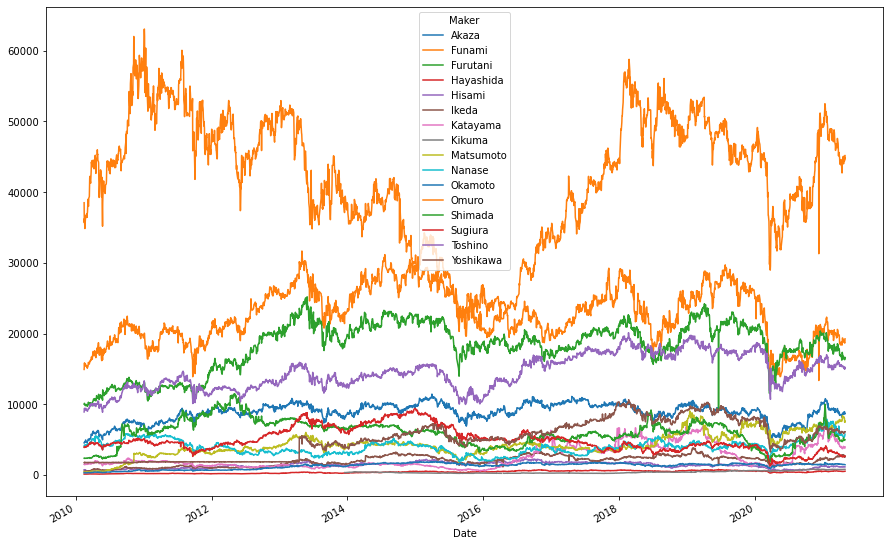

In [47]:
pd.pivot_table(ts, values='Sales', index='Date', columns=['Maker'], aggfunc=np.sum).plot(figsize=(15, 10))

In [48]:
type(pd.pivot_table(ts, values='Sales', index='Date', columns=['Maker'], aggfunc=np.sum))

pandas.core.frame.DataFrame

In [49]:
pvt_maker = pd.pivot_table(ts, values='Sales', index='Date', columns=['Maker'], aggfunc=np.sum)

In [50]:
pvt_maker.columns

Index(['Akaza', 'Funami', 'Furutani', 'Hayashida', 'Hisami', 'Ikeda',
       'Katayama', 'Kikuma', 'Matsumoto', 'Nanase', 'Okamoto', 'Omuro',
       'Shimada', 'Sugiura', 'Toshino', 'Yoshikawa'],
      dtype='object', name='Maker')

In [57]:
pvt_maker['Akaza'][pvt_maker['Akaza'].values < 5000]

Date
2010-02-15    4544.00
2010-02-16    4572.00
2010-02-17    4665.00
2010-02-18    4615.00
2010-02-19    4668.21
2010-02-22    4729.00
2010-02-23    4960.43
2010-02-24    4747.00
2010-02-25    4696.00
2010-03-01    4715.00
2010-03-02    4648.00
2010-03-03    4712.21
2010-03-04    4659.00
2010-03-05    4735.00
2010-03-08    4962.00
2010-03-12    4924.00
2010-03-15    4946.00
2010-05-25    4974.00
2020-03-24    4831.00
Name: Akaza, dtype: float64

In [58]:
df2 = pd.DataFrame(pvt_maker['Akaza'][pvt_maker['Akaza'].values < 5000])
df2

Akaza
Date               
2010-02-15  4544.00
2010-02-16  4572.00
2010-02-17  4665.00
2010-02-18  4615.00
2010-02-19  4668.21
2010-02-22  4729.00
2010-02-23  4960.43
2010-02-24  4747.00
2010-02-25  4696.00
2010-03-01  4715.00
2010-03-02  4648.00
2010-03-03  4712.21
2010-03-04  4659.00
2010-03-05  4735.00
2010-03-08  4962.00
2010-03-12  4924.00
2010-03-15  4946.00
2010-05-25  4974.00
2020-03-24  4831.00

<AxesSubplot:xlabel='Date'>

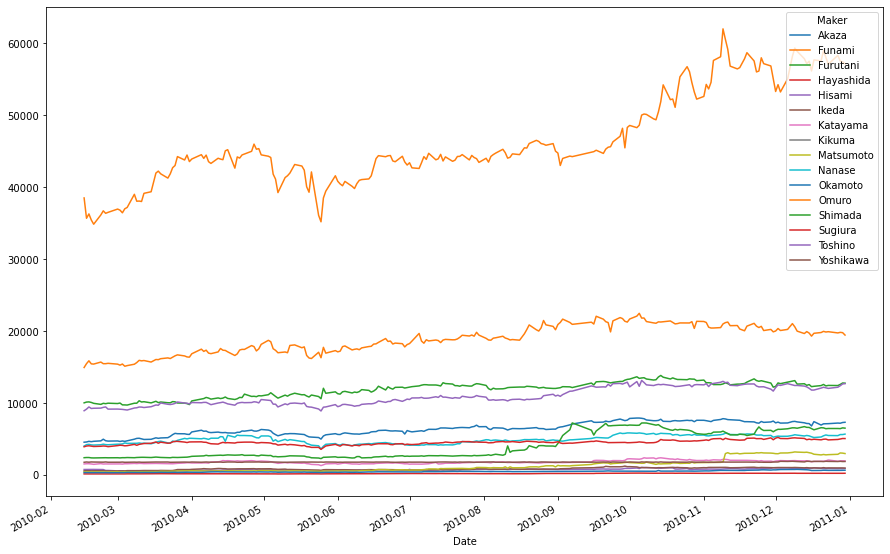

In [64]:
pvt_maker.loc['2010-02-15':'2010-12-31'].plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

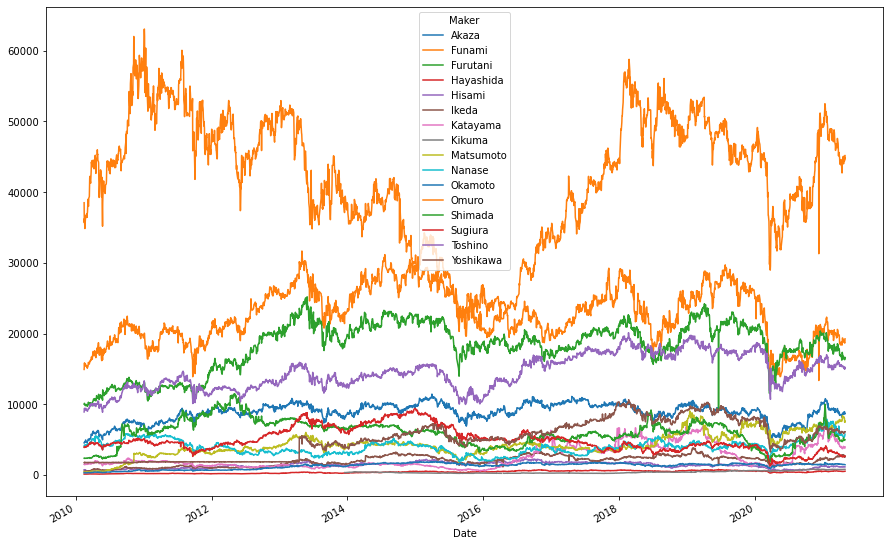

In [76]:
pvt_maker.plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

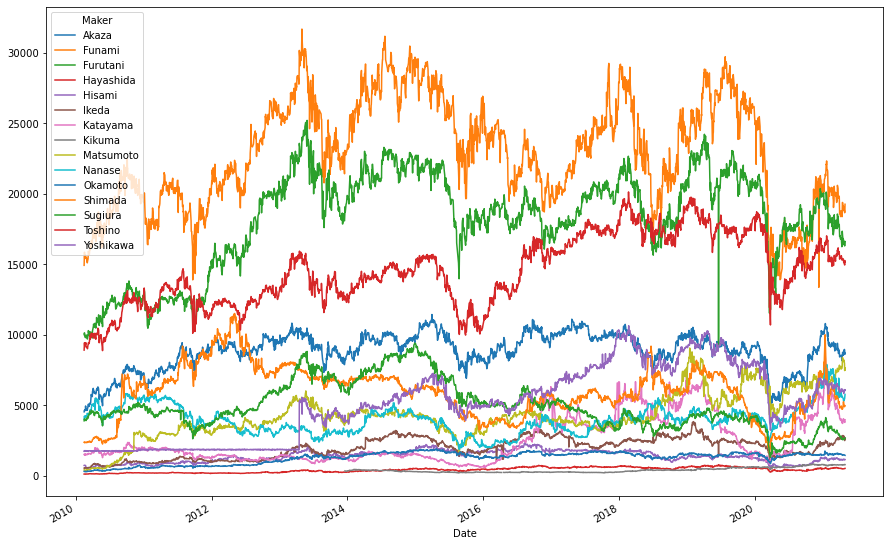

In [78]:
pvt_maker.drop(['Omuro'], axis=1).plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

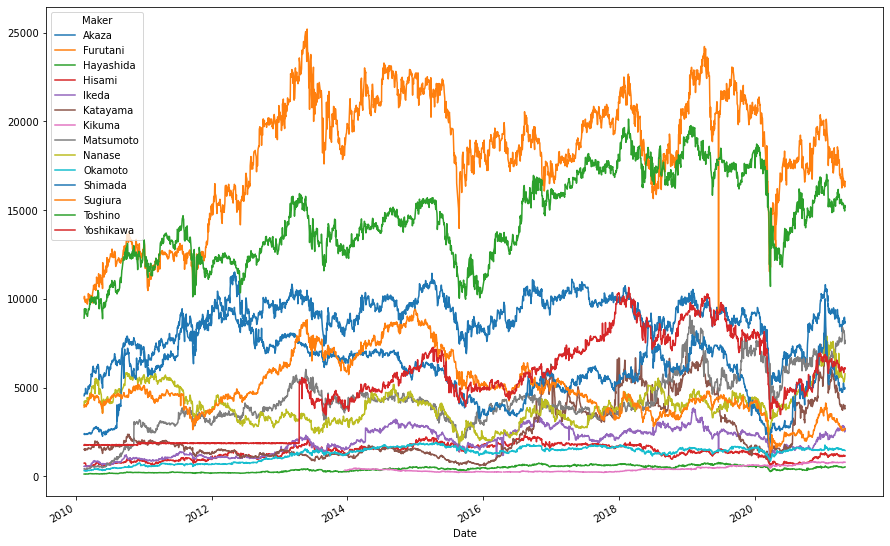

In [79]:
pvt_maker.drop(['Omuro', 'Funami'], axis=1).plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

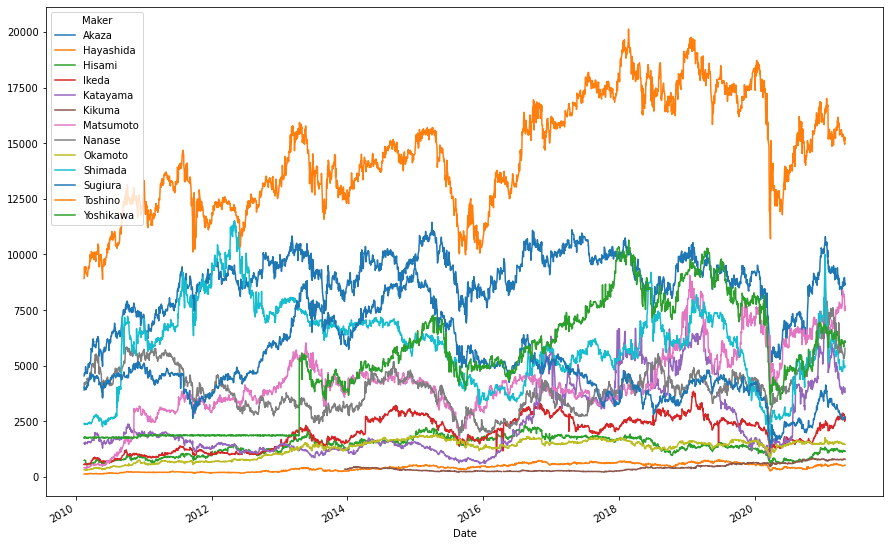

In [80]:
pvt_maker.drop(['Omuro', 'Funami', 'Furutani'], axis=1).plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

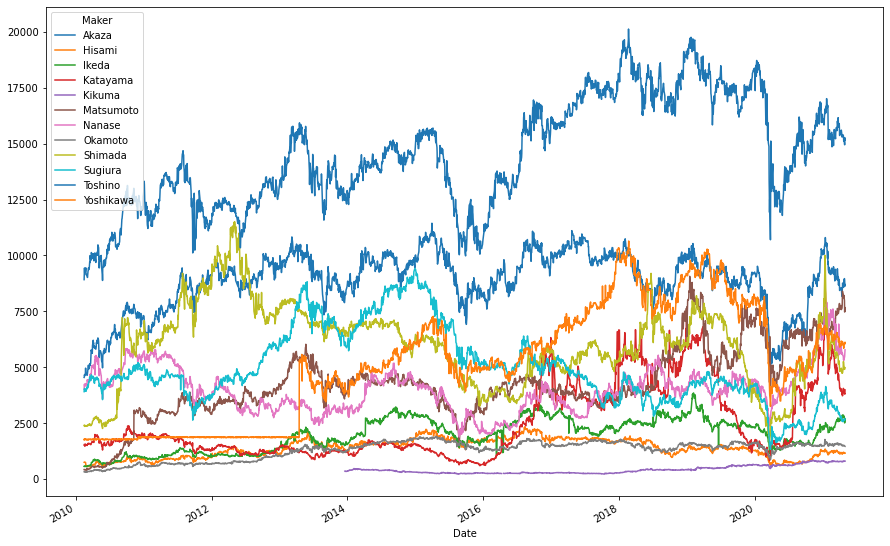

In [81]:
pvt_maker.drop(['Omuro', 'Funami', 'Furutani', 'Hayashida'], axis=1).plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

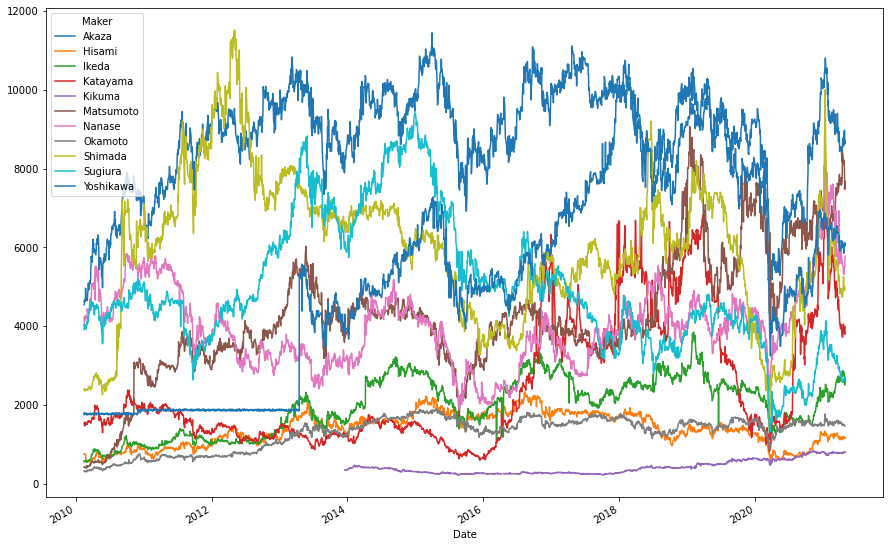

In [83]:
pvt_maker.drop(['Omuro', 'Funami', 'Furutani', 'Hayashida', 'Toshino'], axis=1).plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

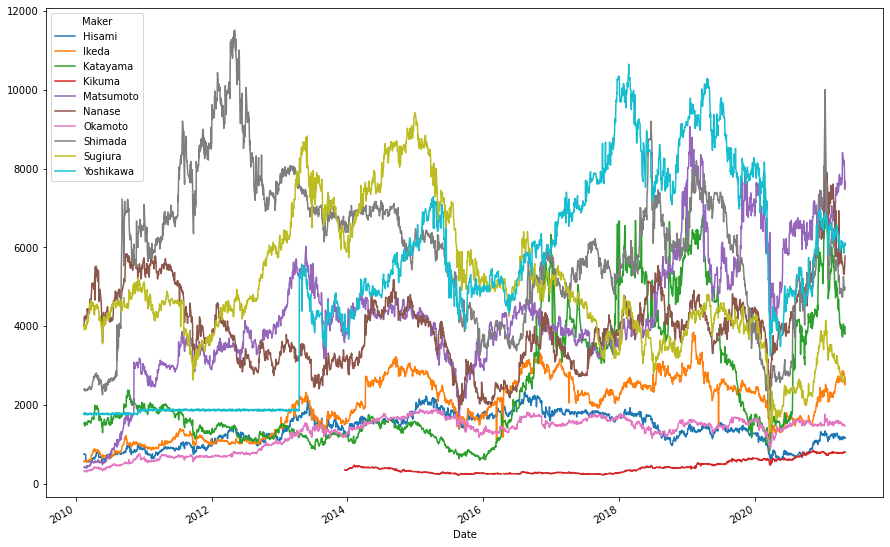

In [84]:
pvt_maker.drop(['Omuro', 'Funami', 'Furutani', 'Hayashida', 'Toshino', 'Akaza'], axis=1).plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

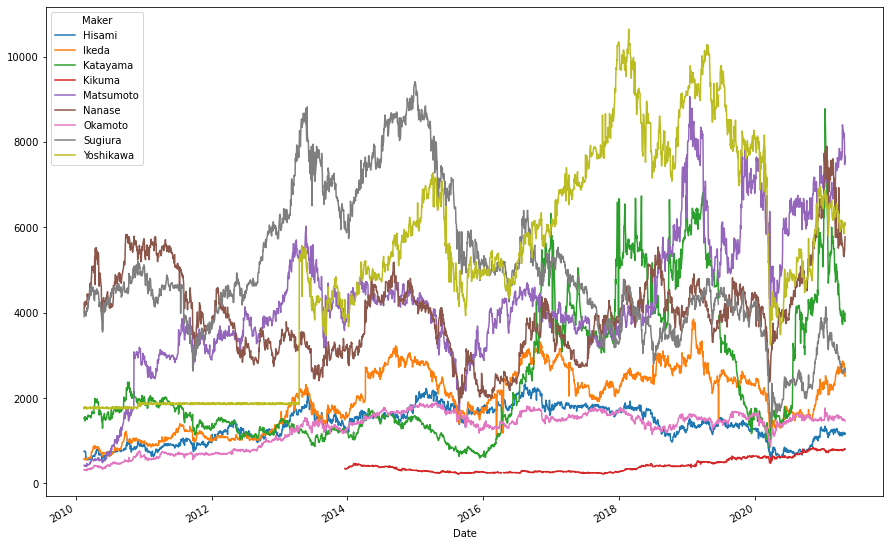

In [85]:
pvt_maker.drop(['Omuro', 'Funami', 'Furutani', 'Hayashida', 'Toshino', 'Akaza', 'Shimada'], axis=1).plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

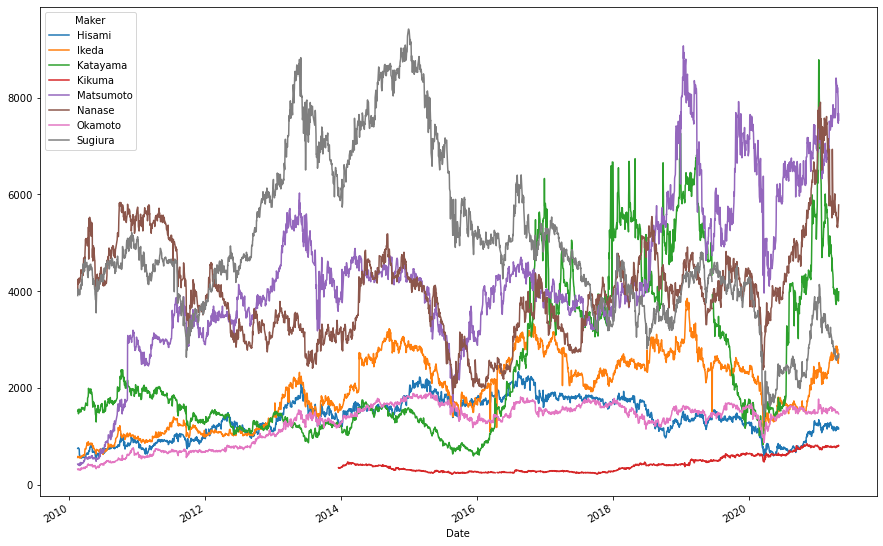

In [86]:
pvt_maker.drop(['Omuro', 'Funami', 'Furutani', 'Hayashida', 'Toshino', 'Akaza', 'Shimada', 'Yoshikawa'], axis=1).plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

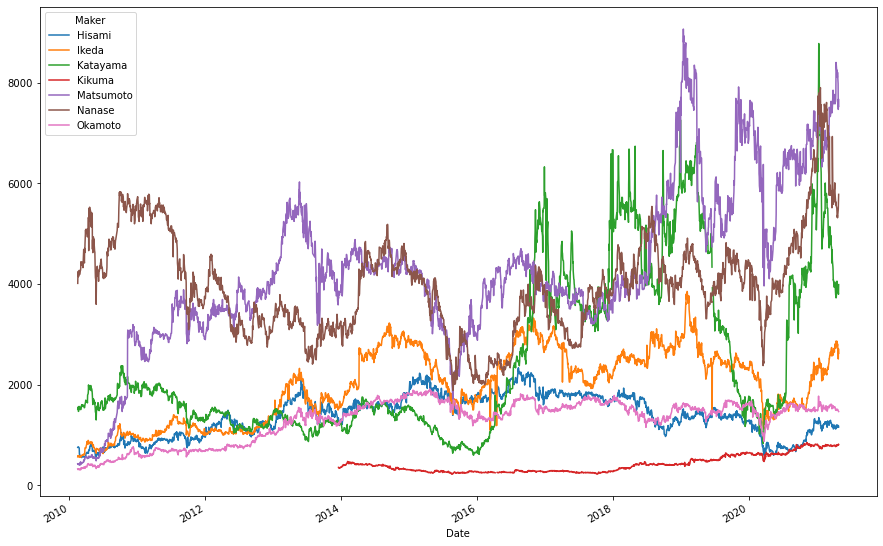

In [88]:
pvt_maker.drop(['Omuro', 'Funami', 'Furutani', 'Hayashida', 'Toshino', 'Akaza', 'Shimada', 'Yoshikawa', 'Sugiura'],
               axis=1).plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

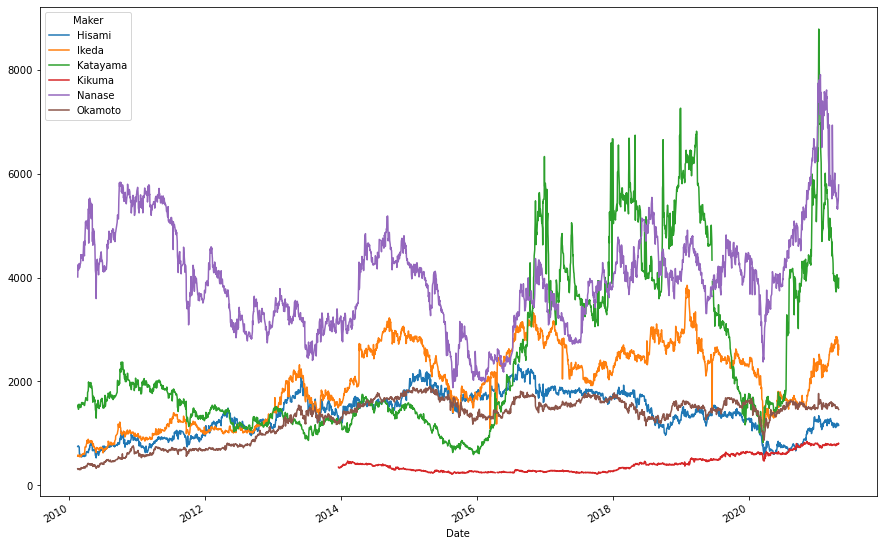

In [89]:
pvt_maker.drop(['Omuro', 'Funami', 'Furutani', 'Hayashida', 'Toshino', 'Akaza', 'Shimada', 'Yoshikawa', 'Sugiura', 'Matsumoto'],
               axis=1).plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

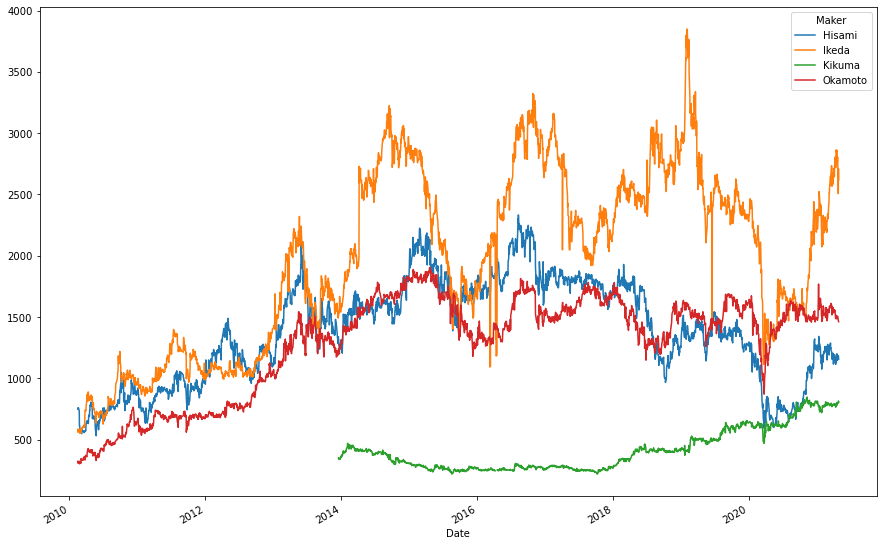

In [91]:
pvt_maker.drop(['Omuro', 'Funami', 'Furutani', 'Hayashida', 'Toshino', 'Akaza', 'Shimada', 'Yoshikawa', 'Sugiura', 'Matsumoto', 'Katayama', 'Nanase'],
               axis=1).plot(figsize=(15, 10))

# -----
## Checkpoint
# -----

In [95]:
by_date

Sales
Date                 
2010-02-15   92680.57
2010-02-16   91157.83
2010-02-17   92596.33
2010-02-18   90822.00
2010-02-19   90028.21
...               ...
2021-04-23  142664.00
2021-04-26  141279.35
2021-04-27  140634.53
2021-04-28  141308.61
2021-04-29  142560.01

[2784 rows x 1 columns]

In [98]:
by_date[by_date.values > 100000]

Sales
Date                 
2010-03-17  100160.17
2010-03-18  100038.33
2010-03-19  100491.93
2010-03-24  101922.00
2010-03-25  102715.00
...               ...
2021-04-23  142664.00
2021-04-26  141279.35
2021-04-27  140634.53
2021-04-28  141308.61
2021-04-29  142560.01

[2744 rows x 1 columns]

In [99]:
by_date.idxmax()

Sales   2018-01-29
dtype: datetime64[ns]

<AxesSubplot:xlabel='Date'>

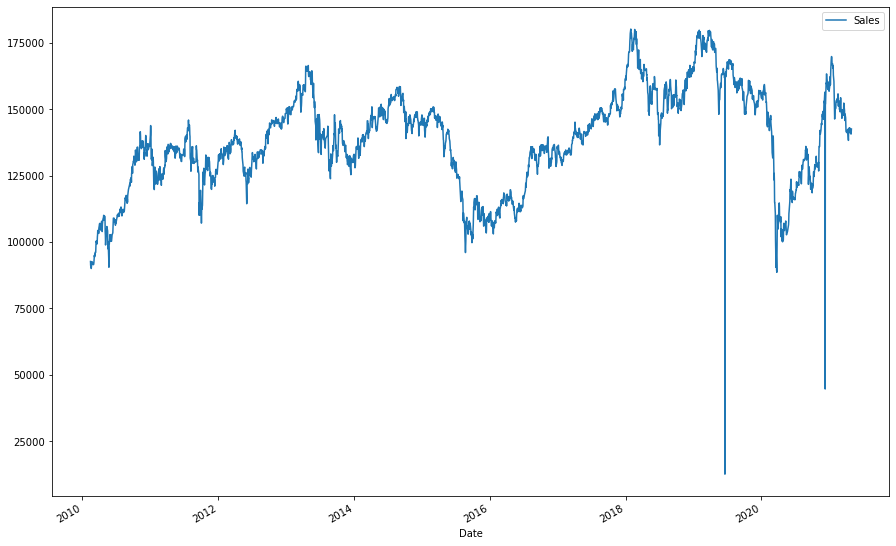

In [100]:
by_date.plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

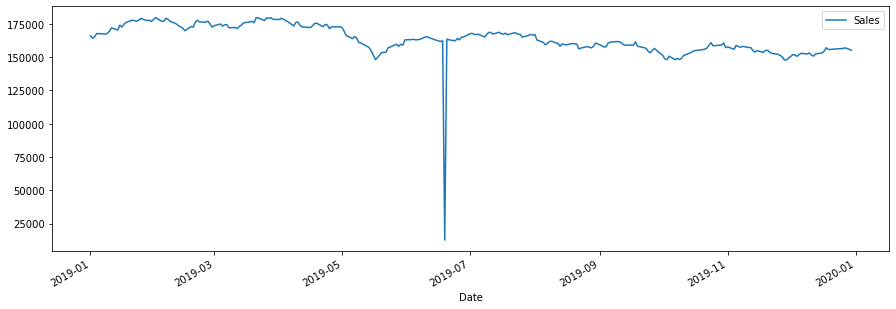

In [101]:
by_date.loc['2019-01-01':'2020-01-01'].plot(figsize=(15, 5))

<AxesSubplot:xlabel='Date'>

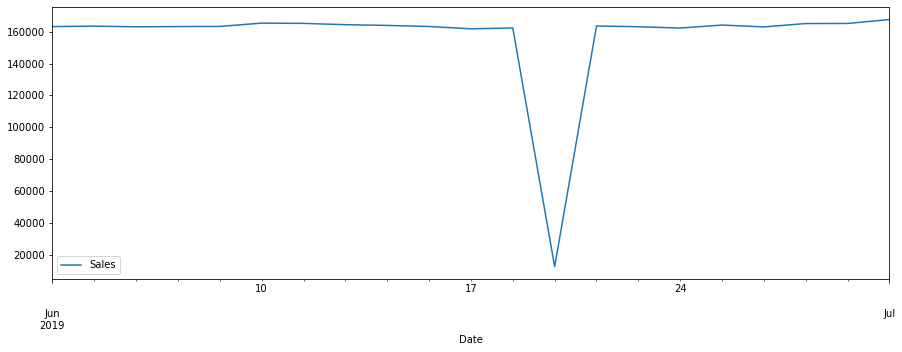

In [102]:
by_date.loc['2019-06-01':'2019-07-01'].plot(figsize=(15, 5))

In [103]:
by_date.loc['2019-06-19']

Sales    12617.0
Name: 2019-06-19 00:00:00, dtype: float64

In [104]:
by_date.loc['2019-06-17':'2019-06-20']

Sales
Date                 
2019-06-17  161765.49
2019-06-18  162263.45
2019-06-19   12617.00
2019-06-20  163518.62

In [107]:
by_date2 = by_date.copy()

In [111]:
by_date.to_csv('sales_by_date-1.csv')

In [112]:
ts = pd.read_csv('sales_by_date-1.csv', index_col='Date', parse_dates=True)

<AxesSubplot:xlabel='Date'>

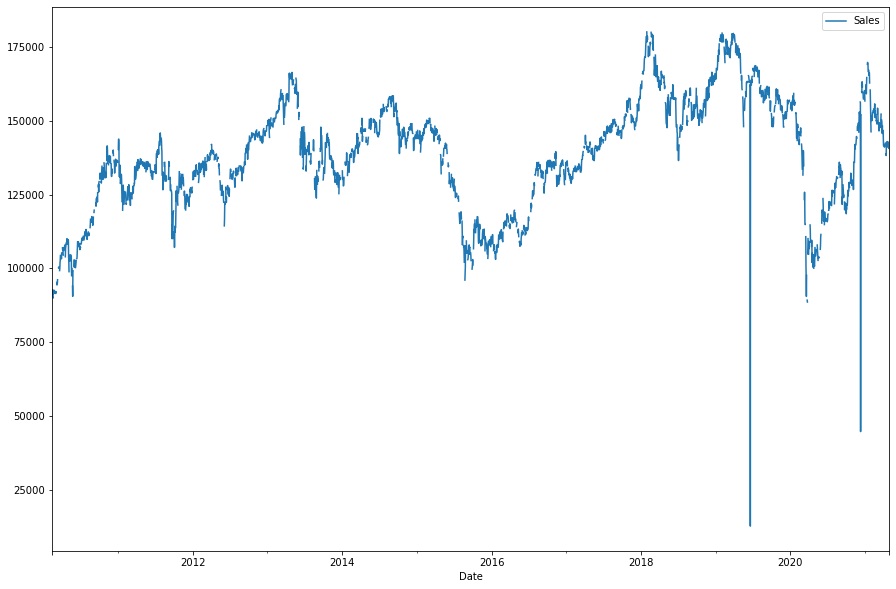

In [123]:
ts.asfreq('D').plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

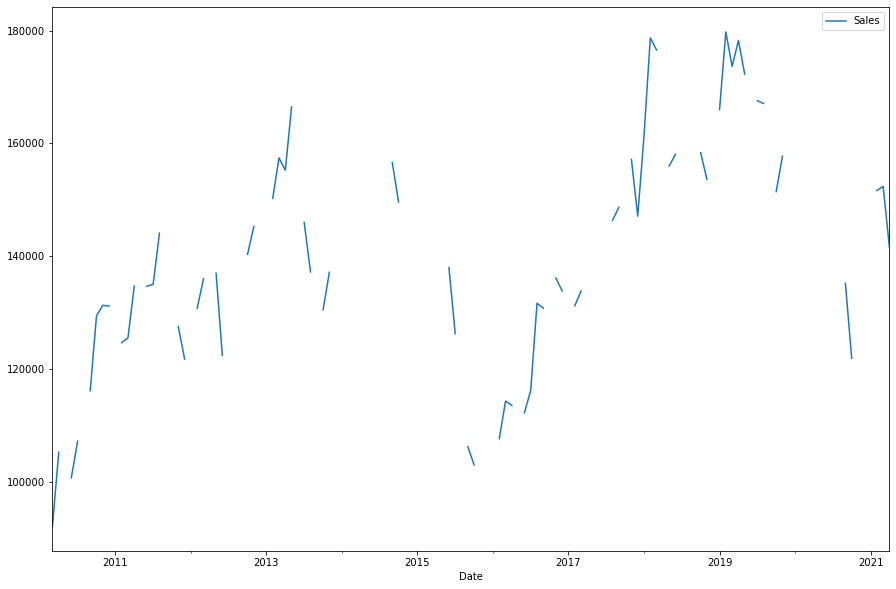

In [124]:
ts.asfreq('MS').plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

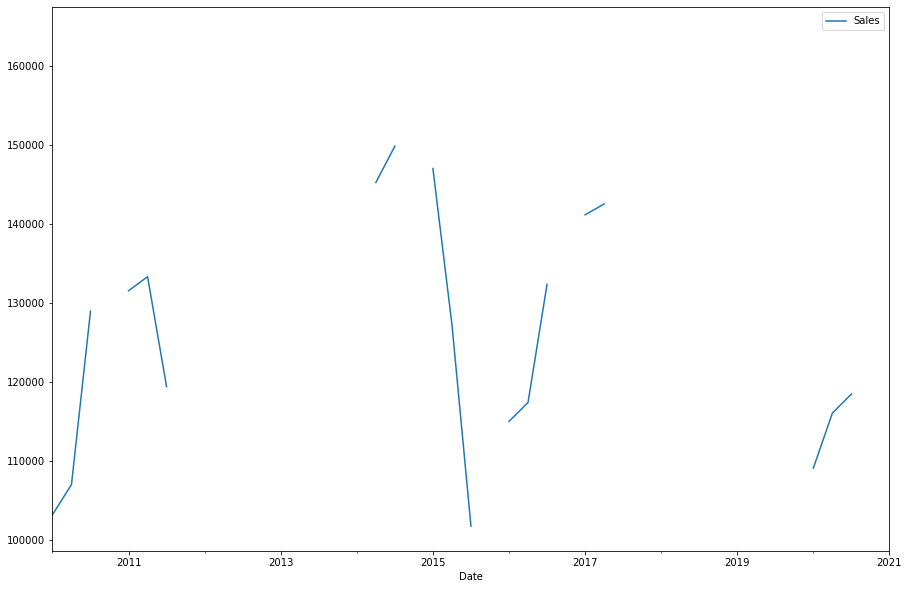

In [125]:
ts.asfreq('Q').plot(figsize=(15, 10))

In [130]:
ts.loc['2019-01-01':'2019-12-31'].shape

(258, 1)

In [131]:
ts.loc['2018-01-01':'2018-12-31'].shape

(261, 1)

In [132]:
ts.loc['2017-01-01':'2017-12-31'].shape

(254, 1)

In [146]:
pvt_cat = pd.pivot_table(df, values='Sales', index='Date', columns=['Category'], aggfunc=np.sum)
pvt_cat

Category    Air Conditioners  Dishwashers  Ovens & Cooktops  Refrigerators  \
Date                                                                         
2010-02-15           4653.00       5001.0          42867.57        6387.00   
2010-02-16           4721.00       5232.0          40137.00        6530.00   
2010-02-17           4892.33       5320.0          40656.00        6666.00   
2010-02-18           4774.00       5201.0          39644.00        6656.00   
2010-02-19           4756.00       5148.0          38968.00        6677.00   
...                      ...          ...               ...            ...   
2021-04-23          16199.00       6354.0          17215.00       35962.00   
2021-04-26          15920.41       6554.0          17005.00       35442.00   
2021-04-27          16097.00       6531.0          16882.00       36067.00   
2021-04-28          16184.00       6689.0          17126.00       35557.00   
2021-04-29          16268.00       7047.0          17238.00       35985.42   

Category    Rice Cookers  Televisions  Vacuum Cleaners  Washers & Dryers  \
Date                                                                       
2010-02-15        6521.0        534.0          1585.00           3950.00   
2010-02-16        6691.0        506.0          1583.00           3992.00   
2010-02-17        6776.0        506.0          1597.00           4058.00   
2010-02-18        6707.0        526.0          1583.00           4016.00   
2010-02-19        6810.0        507.0          1615.21           4019.00   
...                  ...          ...              ...               ...   
2021-04-23       22567.0       7694.0          3766.00           6701.00   
2021-04-26       22191.0       7449.0          3808.94           6711.00   
2021-04-27       21253.0       7471.0          3863.94           6614.59   
2021-04-28       21868.0       7459.0          3837.00           6407.00   
2021-04-29       21463.0       7461.0          3820.00           6493.59   

Category    Water Heaters  Water Pumps  
Date                                    
2010-02-15         314.00      20868.0  
2010-02-16         314.83      21451.0  
2010-02-17         296.00      21829.0  
2010-02-18         304.00      21411.0  
2010-02-19         296.00      21232.0  
...                   ...          ...  
2021-04-23        2976.00      23230.0  
2021-04-26        3036.00      23162.0  
2021-04-27        3059.00      22796.0  
2021-04-28        3057.61      23124.0  
2021-04-29        3125.00      23659.0  

[2784 rows x 10 columns]

<AxesSubplot:xlabel='Date'>

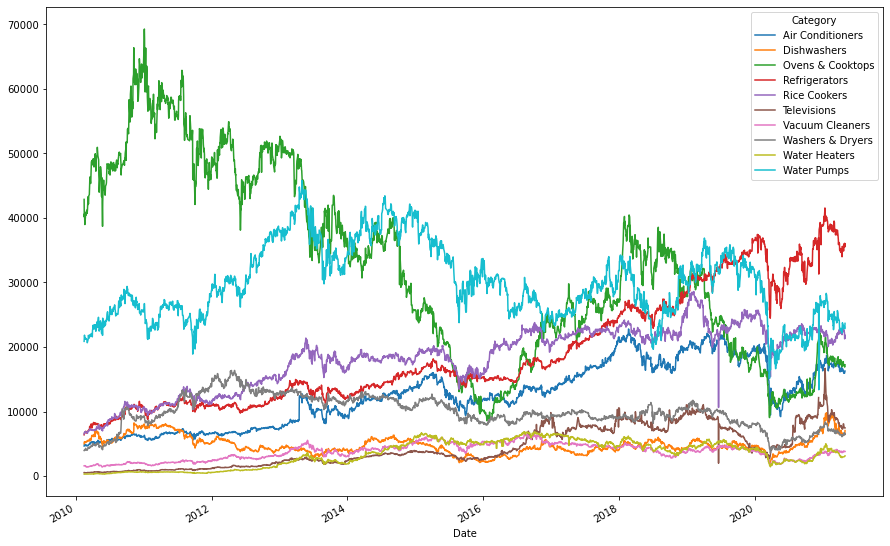

In [147]:
pvt_cat.plot(figsize=(15, 10))

# --------------------
# --------------------
# --------------------

# Answers So Far

# --------------------
# --------------------
# --------------------

## 1. Write a Data Description Report

<h2>Data</h2>
<br>
File name format&nbsp;&nbsp;: 
Year + Quarter. e.g. 2010Q1 is first quarter in year 2010. The files are in CSV format.
<br>
Total dataset&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 
46, from year 2010 - 2021 with an exception only Q1 and Q2 in year 2021.
<br>
Labels&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 
Vary (1000 - 3000 rows).
<br>
Features&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
7

<h2> Features Description </h2>
<br>
Date&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
The date of the sales (YY-mm-dd).
<br>
Category1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
First word of the item category.
<br>
Category2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
Second word of the item category.
<br>
Category3&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
Third word of the item category.
<br>
Maker&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
The name of the item maker
<br>
Sales&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
Number of sales
<br>
Identifier&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:
Item ID

<h2>Objective(s)</h2>
<br>
<li> Exploratory Data Analysis (EDA) </li>
<li> Data cleaning </li>
<li> Data modeling </li>

## 2. Take Out the Data Belonging to PT. D.K. Works

In [138]:
df[~df['Identifier'].str.contains(r'[0-9]')]

Date      Category1     Category2 Category3      Maker    Sales  \
0       2010-02-15            Air  Conditioners       NaN    Toshino   2143.0   
2       2010-02-15        Washers             &    Dryers      Akaza   3515.0   
3       2010-02-15  Refrigerators           NaN       NaN      Akaza    687.0   
4       2010-02-15        Washers             &    Dryers    Shimada    435.0   
6       2010-02-15  Refrigerators           NaN       NaN     Funami    726.0   
...            ...            ...           ...       ...        ...      ...   
134956  2021-04-29          Ovens             &  Cooktops    Shimada   1258.0   
134960  2021-04-29        Washers             &    Dryers      Akaza   5422.0   
134961  2021-04-29         Vacuum      Cleaners       NaN  Hayashida    539.0   
134962  2021-04-29          Water         Pumps       NaN   Furutani  10547.0   
134963  2021-04-29    Televisions           NaN       NaN     Kikuma    805.0   

        Identifier  
0       RVFWTWSMNU  
2       VUQUQMHODG  
3       XVIOZZOUTN  
4       RBRMDIXXGL  
6        BIBIOOIHA  
...            ...  
134956  WVJTPVZKAQ  
134960  VUQUQMHODG  
134961  GCPKFKSEWG  
134962  FVDHIZGQRC  
134963  FRBLLORNXN  

[93171 rows x 7 columns]

## 3. Demonstrate a Method for Predicting the Client's Future Sales Numbers

Time series, forcasting, statsmodels

## 4. Predict When, If It Happens, a Total of 30 Million Goods is Sold by the Client in 2021

Time series, forcasting, statsmodels

## 5. Suggest to the Client Which Product(s) You Think They Should Cut

<AxesSubplot:xlabel='Date'>

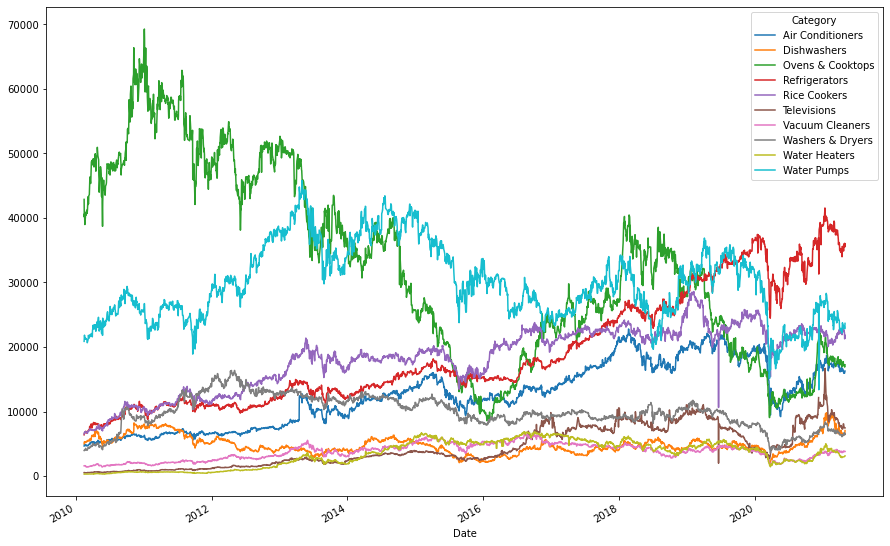

In [148]:
pvt_cat = pd.pivot_table(df, values='Sales', index='Date', columns=['Category'], aggfunc=np.sum)
pvt_cat.plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

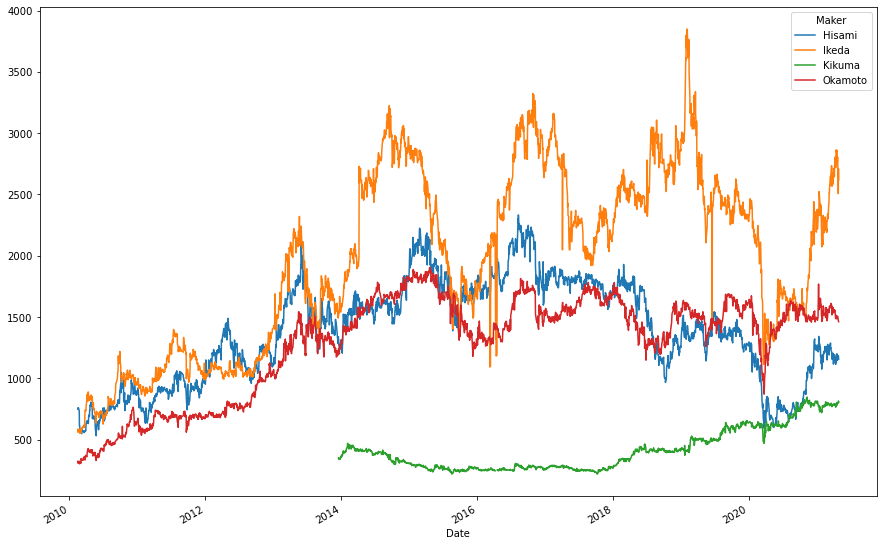

In [150]:
pvt_maker = pd.pivot_table(df, values='Sales', index='Date', columns=['Maker'], aggfunc=np.sum)
pvt_maker.drop(['Omuro', 'Funami', 'Furutani', 'Hayashida', 'Toshino', 'Akaza', 'Shimada', 'Yoshikawa', 'Sugiura', 'Matsumoto', 'Katayama', 'Nanase'],
               axis=1).plot(figsize=(15, 10))

## 6. Propose Several Ways the Client Could Follow to Improve Their Data Collection and Propose to Them What Data They Could Collect to Accomodate Future Data Analysis.

<AxesSubplot:xlabel='Date'>

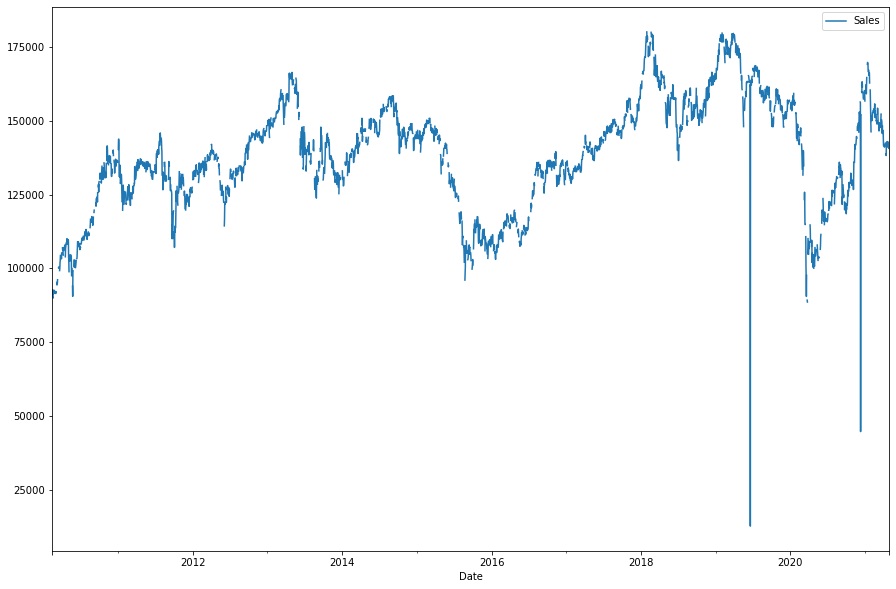

In [152]:
ts = pd.read_csv('sales_by_date-1.csv', index_col='Date', parse_dates=True)
ts.asfreq('D').plot(figsize=(15, 10))

<AxesSubplot:xlabel='Date'>

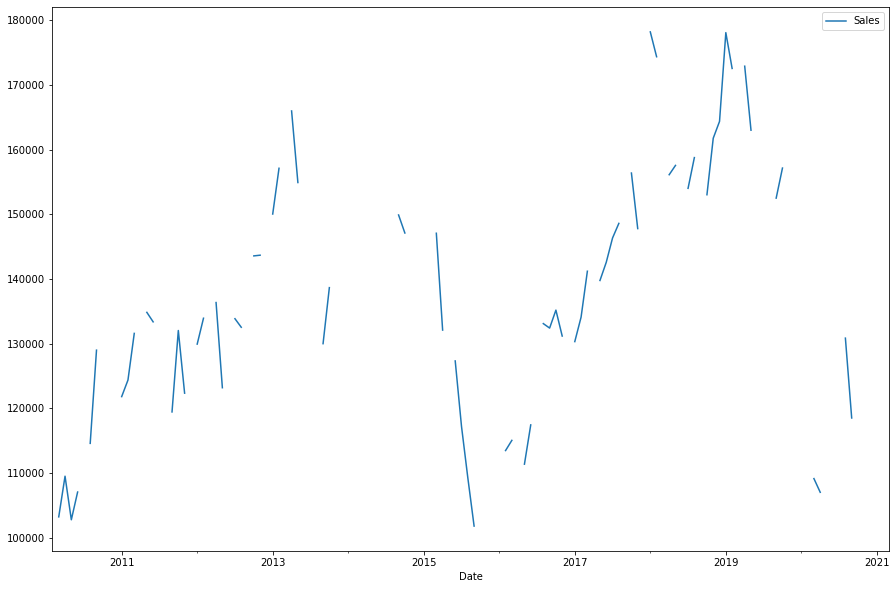

In [153]:
ts.asfreq('M').plot(figsize=(15, 10))

In [157]:
ts.loc['2016-01-01':'2016-12-31'].shape

(246, 1)

In [154]:
ts.loc['2017-01-01':'2017-12-31'].shape

(254, 1)

In [155]:
ts.loc['2018-01-01':'2018-12-31'].shape

(261, 1)

In [156]:
ts.loc['2019-01-01':'2019-12-31'].shape

(258, 1)

Can be more consistent in collecting the data, for example, input the data once a week/month instead of every single day